In [45]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [46]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [47]:
std_scaler=StandardScaler()
std_scaler.fit(X)
X=std_scaler.transform(X)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [94]:

def svm_sgd(X_train,X_test,Y_train,Y_test,epochs = 100):

    w = np.zeros(len(X_train[0]))
    eta = 1
    train_acc=[]
    test_acc=[]
    W=[]
  

    for epoch in range(1,epochs):
        for i, x in enumerate(X_train):
            if (Y_train[i]*np.dot(X_train[i], w)) < 1:
                w = w + eta *( (X_train[i] * Y_train[i]) + (-2  *(1/epoch)* w) )
                
            else:
                w = w + eta * (-2  *(1/epoch)* w)
            
        train_acc.append(accuracy_score(Y_train,predict(w,X_train)))
        test_acc.append(accuracy_score(Y_test,predict(w,X_test)))
        W.append(w)
    
    return train_acc,test_acc,W


def predict(w,x):
    N=len(x)
    predict=[]
    for i in range(N):
        if np.dot(x[i],w)>0:
            predict.append(1)
        else:
            predict.append(0)
    
    return np.array(predict)

In [99]:
train_acc,test_acc,W = svm_sgd(X_train,X_test,y_train,y_test,1000)
# print(w)

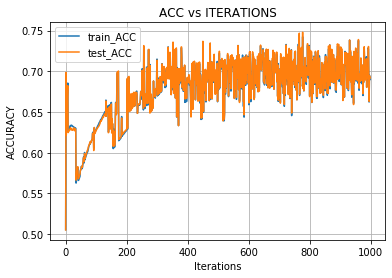

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_acc, label='train_ACC')
plt.plot(test_acc, label='test_ACC')
plt.grid()
plt.legend()
plt.title('ACC vs ITERATIONS')
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.show()

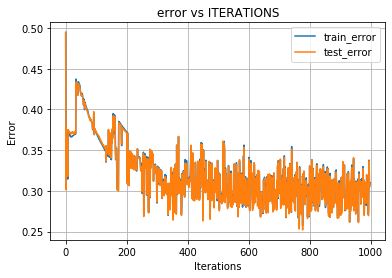

In [101]:
train_error=[]
test_error=[]
for x,y in zip(test_acc,train_acc):
    train_error.append(1-y)
    test_error.append(1-x)

plt.plot(train_error, label='train_error')
plt.plot(test_error, label='test_error')
plt.grid()
plt.legend()
plt.title('error vs ITERATIONS')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

    

## REPORT

In [102]:
index=np.argmin(train_error)
w=W[index]

print("\nThe best determined W is : ", w)
print("\nThe accuracy at best determined W on test data is : ",accuracy_score(y_test,predict(w,X_test)))


The best determined W is :  [-3.95303612  2.0636546   0.91030582  3.47342274 -0.7851429   2.78466218
 -5.4811727  -0.23050023  1.72910122  2.07035449  0.5792288   0.21162904
 -1.82569601  3.25568317  1.24147954]

The accuracy at best determined W on test data is :  0.74688
